In [2]:
import matplotlib.pyplot as plt
import numpy as np
import inspect

In [11]:
class BHO():
    def __init__(self, problem, problem_dim, population_size):
        self.problem = problem
        self.dim = problem_dim
        self.pop_size = population_size
        self.population = []
        self.blackhole = None
        self.R = None  # the radius of event horizon
        
    def init_population(self):
        self.population = (np.random.randint(low = -10, high = 10, size=(self.pop_size, 2))).astype('object')
        none = np.full((self.pop_size, 1), None, dtype=object)
        self.population = np.append(self.population, none, axis=  1) # add a column with value None for fitness

    def calculate_fitness(self):
        for star in self.population:
            star[-1] = self.problem(star[0], star[1])  # calculate the fitness and add it to population

    def find_black_hole(self):
        self.blackhole = self.population[self.population[:, 2].argsort()][0]

    def move_stars(self):
        for star in self.population:
            if not np.array_equal(star, self.blackhole):
                star[:-1] = star[:-1] + (np.random.rand() * (self.blackhole[:-1] - star[:-1]))

    def is_in_event_horizon(self):
        for star in self.population:
            if not np.array_equal(star, self.blackhole):
                distance = np.linalg.norm(star[:-1] - self.blackhole[:-1])
                if distance < self.R: # the star is absorbed
                    star[:-1] = np.random.randint(low = -10 , high = 10, size=(1, 2)) # new star is created
        

    def calculate_radius(self):
        self.R = self.blackhole[-1] / np.sum(self.population[-1])
        
    def run(self, epoch):
        print('The Blackhole optimization algorithm is running...')
        # Step 1: initialize the stars
        self.init_population() 
        
        # Step 2: Calculate the fitness
        self.calculate_fitness()

        # Step 3: Find the blackhole
        self.find_black_hole()
        
        for i in range(epoch):
            print(f"epoch : {i} - best solution : {self.blackhole}")
            
            # Step 4: Move the satrs
            self.move_stars()
            self.calculate_fitness()
            
            # Step 5: Check if the stars are close to the black hole
            self.calculate_radius()
            self.is_in_event_horizon()

            # Step 6: Update black hole if a better star is shown
            self.find_black_hole()

In [12]:
def problem(x, y):
    return np.square(x) + np.square(y)

In [13]:
# Set parameters
problem_dim = len(inspect.signature(problem).parameters)
population_size = 20
epoch = 10

In [14]:
bho = BHO(problem, problem_dim, population_size)

In [15]:
bho.run(epoch)

The Blackhole optimization algorithm is running...
epoch : 0 - best solution : [1 2 5]
epoch : 1 - best solution : [1.2439134134374459 0.048692692500432955 1.54969155843254]
epoch : 2 - best solution : [-5 2 0.14600683613590293]
epoch : 3 - best solution : [0.9069476741868555 0.15399903899166106 0.8462697877233017]
epoch : 4 - best solution : [-0.09440844847600793 0.4499335075323634 0.21135311634402235]
epoch : 5 - best solution : [0.2104216037105443 0.34328366945914823 0.1621209290254551]
epoch : 6 - best solution : [-0.13119358120065838 0.23908524800287578 0.07437351156085037]
epoch : 7 - best solution : [5 4 0.06121129495915969]
epoch : 8 - best solution : [-0.23916881395435732 0.5795625828892084 0.3930945090535445]
epoch : 9 - best solution : [-0.36491246971759633 -0.0006221934977381771 0.1331614976801443]


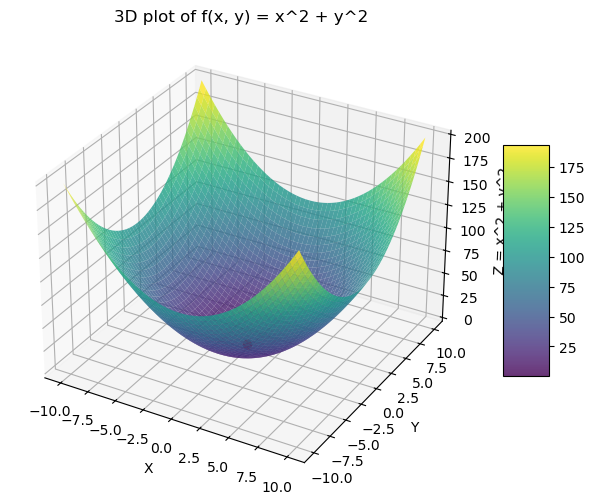

In [16]:
# Create a grid of points over [-10, 10] for x and y
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x, y)
Z = problem(X, Y)

# Plot the best solution
best_x = bho.blackhole[0]
best_y = bho.blackhole[1]

# Plotting
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.8)

ax.plot(best_x, best_y, color='r',marker='o', label = 'BHO Solution')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z = x^2 + y^2')
ax.set_title('3D plot of f(x, y) = x^2 + y^2')

fig.colorbar(surf, shrink=0.5, aspect=5)  # Add color bar

plt.show()
